# Project 1 Analysis

### For this project, we were tasked to answer two main questions.
1-What are the 5 most popular trips that you would call commuter trips?\
2-What are your recommendations for offers (justify based on your findings)?

## First Part

First of all, I needed to get a sense of how many stations are there in each city in our database. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%%bigquery
SELECT count(name) AS number_of_stations, landmark AS City 
FROM `bigquery-public-data`.san_francisco.bikeshare_stations
GROUP BY City
ORDER BY number_of_stations DESC 

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.63rows/s]


,number_of_stations,City
0,37,San Francisco
1,18,San Jose
2,7,Mountain View
3,7,Redwood City
4,5,Palo Alto


We can see that San Francisco has the most number of stations, followed by San Jose and so on. 

Next, I wanted to see what are the total number of trips for each station pair. How does it look like during weekdays vs weekends? I found the following.  

In [3]:
%%bigquery 
SELECT start_station_name, end_station_name, count(*) as no_of_trips 
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
GROUP BY start_station_name, end_station_name 
ORDER BY no_of_trips DESC 
LIMIT 10;

#Total number of trips between stations pairs.

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.21rows/s]


,start_station_name,end_station_name,no_of_trips
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874
5,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6836
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6351
7,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),6215
8,Steuart at Market,2nd at Townsend,6039
9,Steuart at Market,San Francisco Caltrain (Townsend at 4th),5959


In [4]:
%%bigquery station_pairs_weekdays
SELECT start_station_name, end_station_name, count(*) as no_of_trips 
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
WHERE EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7) 
GROUP BY start_station_name, end_station_name 
ORDER BY no_of_trips DESC 
LIMIT 10;

#Total number of trips between stations pairs during WEEKDAYS


Downloading: 100%|██████████| 10/10 [00:01<00:00,  8.56rows/s]


In [5]:
station_pairs_weekdays.head(10)

,start_station_name,end_station_name,no_of_trips
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8048
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,7072
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7043
3,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6471
4,Embarcadero at Sansome,Steuart at Market,6419
5,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6378
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6158
7,Steuart at Market,2nd at Townsend,5794
8,Steuart at Market,San Francisco Caltrain (Townsend at 4th),5772
9,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),5764


In [6]:
station_pairs_weekdays["station_pairs"] = station_pairs_weekdays["start_station_name"] + " --> " + station_pairs_weekdays["end_station_name"] 
station_pairs_weekdays.head()

,start_station_name,end_station_name,no_of_trips,station_pairs
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8048,San Francisco Caltrain 2 (330 Townsend) --> To...
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,7072,Harry Bridges Plaza (Ferry Building) --> Embar...
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7043,2nd at Townsend --> Harry Bridges Plaza (Ferry...
3,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6471,Townsend at 7th --> San Francisco Caltrain 2 (...
4,Embarcadero at Sansome,Steuart at Market,6419,Embarcadero at Sansome --> Steuart at Market


In [7]:
%%bigquery station_pairs_weekends
SELECT start_station_name, end_station_name, count(*) as no_of_trips 
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) 
GROUP BY start_station_name, end_station_name 
ORDER BY no_of_trips DESC 
LIMIT 10;

#Total number of trips between stations pairs during WEEKENDS

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.37rows/s]


In [8]:
station_pairs_weekends.head()

,start_station_name,end_station_name,no_of_trips
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,2078
1,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),1183
2,Embarcadero at Sansome,Embarcadero at Sansome,1146
3,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),1122
4,Embarcadero at Bryant,Embarcadero at Sansome,701


In [9]:
station_pairs_weekends["station_pairs"] = station_pairs_weekends["start_station_name"] + " --> " + station_pairs_weekends["end_station_name"] 
station_pairs_weekends.head()

,start_station_name,end_station_name,no_of_trips,station_pairs
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,2078,Harry Bridges Plaza (Ferry Building) --> Embar...
1,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),1183,Embarcadero at Sansome --> Harry Bridges Plaza...
2,Embarcadero at Sansome,Embarcadero at Sansome,1146,Embarcadero at Sansome --> Embarcadero at Sansome
3,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),1122,Harry Bridges Plaza (Ferry Building) --> Harry...
4,Embarcadero at Bryant,Embarcadero at Sansome,701,Embarcadero at Bryant --> Embarcadero at Sansome


Let's see the difference in graphical format. 

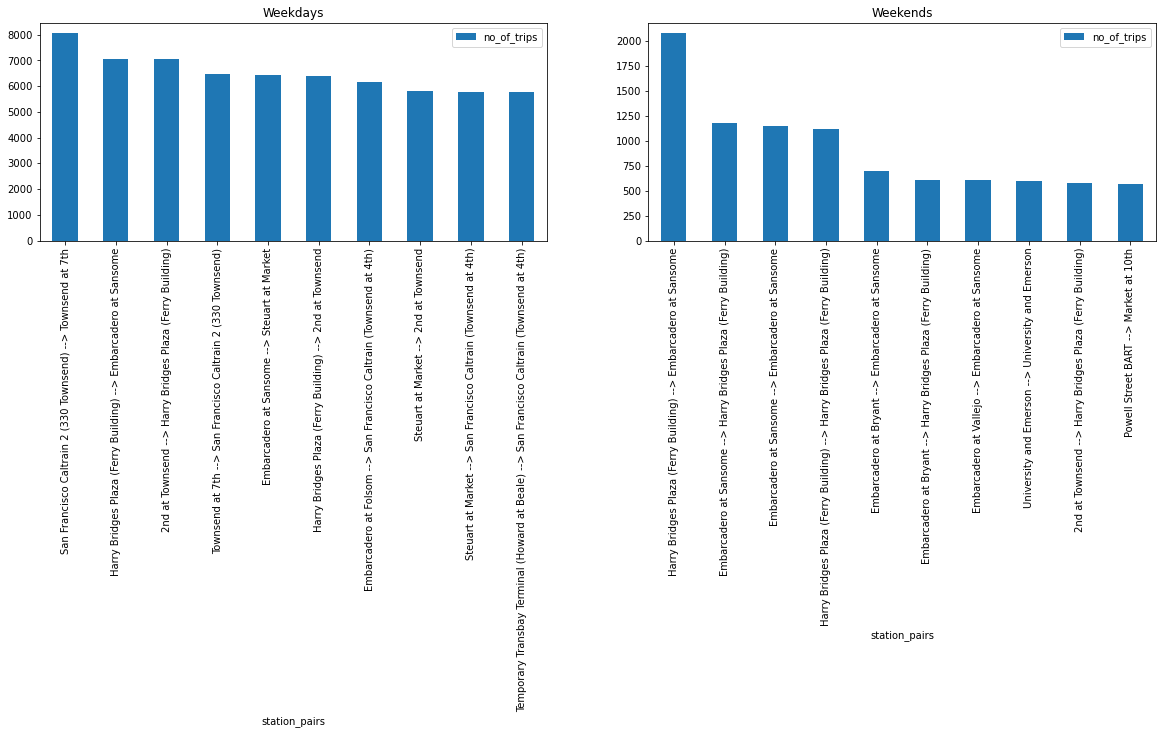

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,4))

station_pairs_weekdays.plot(kind="bar", x="station_pairs", y="no_of_trips", title = "Weekdays", ax=ax1)


station_pairs_weekends.plot(kind="bar", x="station_pairs", y="no_of_trips", title = "Weekends", ax=ax2)
pass

## First Question Discussion

Based on my data analysis from above, below are my findings.

1-The top 5 station pairs with the most number of trips during WEEKDAYS are the following 
- San Francisco Caltrain 2 (330 Townsend) --> Townsend at 7th
- Harry Bridges Plaza (Ferry Building)    --> Embarcadero at Sansome
- 2nd at Townsend                         --> Harry Bridges Plaza (Ferry Building)
- Townsend at 7th                         --> San Francisco Caltrain 2 (330 Townsend)
- Embarcadero at Sansome                  --> Steuart at Market


2-The top 5 station pairs with the most number of trips during WEEKEENDS are the following 
- Harry Bridges Plaza (Ferry Building) --> Embarcadero at Sansome
- Embarcadero at Sansome --> Harry Bridges Plaza (Ferry Building)
- Embarcadero at Sansome --> Embarcadero at Sansome
- Harry Bridges Plaza (Ferry Building) --> Harry Bridges Plaza (Ferry Building)
- Embarcadero at Bryant --> Embarcadero at Sansome

Most of the trips happend between station pairs that are located in San Francisco, which makes sense given that 37 stations in our dataset are located in San Francisco. Furthermore, looking at the number of trips, locations, and the graphs above, I believe that the most number of trips during weekdays are mainly for commuter purposes. The justification being that the station pairs that are prominent during weekdays have much fewer trips during weekends. Although some stations do show up for both weekends and weekdays, the explanation for that is the fact that those stations are at the hub of San Francisco, therefore, they will still be used during weekends.

Another interesting fact from the graphs shows us that some of the station pairs start and end at the same station for weekends that may indicate that they are being used for leisure purposes. On the other hand, the station pairs San Francisco Caltrain 2 (330 Townsend) and Townsend at 7th show commute both ways which furhter points to it being a commuter route. 

Considering everything above, it is safe to say that the top 5 station pairs during weekdays are primarily used for commuter purposes.  

## Second Part

First, I wanted to see how many tirps occur during weekdays vs weekends. I found the following 

In [15]:
%%bigquery 
SELECT COUNT(subscriber_type)
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7) 

#The number of trips during WEEKDAYS is 871,994 trips. 


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.69s/rows]


,f0_
0,871994


In [12]:
%%bigquery 

SELECT COUNT(subscriber_type), 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) 

#The number of trips during WEEKENDS is 111,654 trips

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.72s/rows]


,f0_
0,111654


We can see that the number of trips taken during weekdays is considerably higher compared to weekends.\
Next, I wanted to see the number of trips during rush hours (I defined the rush hour being between the peak commuting hours which are from 6:00 am to 9:00 am and 4:00 pm to 6:00 pm)

In [16]:
%%bigquery
SELECT COUNT(subscriber_type), 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7) and (
(EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 9) 
OR (EXTRACT(HOUR FROM start_date) >= 16 and EXTRACT(HOUR FROM start_date) <= 18))

# We can see that there are 580,513 trips during rush hour alone. 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.38s/rows]


,f0_
0,580513


After finding out the number of trips during rush hours, I wanted to see how many trips are taken by customers and subscribers during the rush hours to gain some insight. 

In [17]:
%%bigquery
SELECT COUNT(*), 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Customer" and 
EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7) and (
(EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 9) 
OR (EXTRACT(HOUR FROM start_date) >= 16 and EXTRACT(HOUR FROM start_date) <= 18))

# We can see that there are about 31,526 trips are taken by our customers 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.39s/rows]


,f0_
0,31526


In [19]:
%%bigquery
SELECT COUNT(*), 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber" and 
EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7) and (
(EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 9) 
OR (EXTRACT(HOUR FROM start_date) >= 16 and EXTRACT(HOUR FROM start_date) <= 18))

# We can see that there are about 548,987 trips are taken by our subscribers 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.46s/rows]


,f0_
0,548987


Based on the resutls above, we can see that the most trips taken by people taken during rush hours on weekdays is by our subscribers.\
After gaining valuable insight from above, next, I wanted to see what is the average trip time between customers and subscribers overall. To do this, I included the trips that DO NOT exceed 24 hours to get rid of outliers not to sku my results. 

In [25]:
%%bigquery
SELECT count(duration_sec)
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
WHERE duration_sec > 86400

# number of trips that exceed 100,000 are 296 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.36s/rows]


,f0_
0,296


In [24]:
%%bigquery
SELECT count(duration_sec)
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
WHERE duration_sec > 1000000

# number of trips that exceed 1000,000 are 4

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.31s/rows]


,f0_
0,4


In [20]:
%%bigquery
SELECT subscriber_type, AVG(duration_sec)/60 as average_trip_time_in_min
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
WHERE duration_sec < 86400
GROUP BY subscriber_type


Downloading: 100%|██████████| 2/2 [00:02<00:00,  1.23s/rows]


,subscriber_type,average_trip_time_in_min
0,Customer,53.483072
1,Subscriber,9.505266


Based on the table above, we can clearly see that on average CUSTOMERS ride our bikes for about 53.48 mins compared to SUBSCRIBERS that ride our bikes for about 9.5 mins. This is a big difference. 

One more thing, I wanted to see is how many customers and how many subscribers do we have. 

In [28]:
%%bigquery
SELECT count(subscriber_type)
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
WHERE subscriber_type = 'Customer'

# we have 136,809 customers 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.37s/rows]


,f0_
0,136809


In [29]:
%%bigquery
SELECT count(subscriber_type)
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
WHERE subscriber_type = 'Subscriber'

#We have 846,839 subscribers. 

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.35s/rows]


,f0_
0,846839


## Second Question Discussion

The current perks that are offered by subscribers(members) are the following. 

A. No $3 unlocking fees 

B. Save 33% per ebike minute compared to non-sbuscribers.

C. $13/month for unlimited 45-minute classic rides

After our analysis, these are our findings:
- 88.64% of the trips happen during weekdays 
- 59.01% of the trips happend during rush hours of weekdays (Mon-Friday 6:00 am to 9:00 am and 4:00 pm to 6:00 pm)
- Of all the rush hour trips, 94.5% of the trips are performed by subscribers. 
- Subscribers(members), however, spend close to 9.5 mins/trip while customers(non-members) spend close 53.48 mins/trip


I see a lot of opporunities to convert our non-members to members. This will have two benefits
- It will create recurring revenues. 
- Since customers' ride last for about 53.48 mins/trip, they may be willing to subscribe for our monthy membership and save money. On top of that, they will save $3 for each unlock. 

To increase the incentive for our customers to convert to members, I would like to propose aggressive marketting in the following key stations because of heavy traffic based on our results.

- San Francisco Caltrain 2 (330 Townsend)
- Harry Bridges Plaza (Ferry Building)
- Embarcadero at Sansome
- Townsend at 7th
- 2nd at Townsend

Furthermore, I suggest lifting the limitations for "Bike Share for All" program for a short period of time to increase the incentive for non-members to sign up for a membership. We should put much more focus on non-members for now because of ride-time/trip. Furthermore, having more marketting exposure in key stations might increase overall membership count during rush hours. 